     sepal.length  sepal.width  petal.length  petal.width    Class_labels
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
                 precision    recall  f1-score   support

    Iris-setosa       1.00    

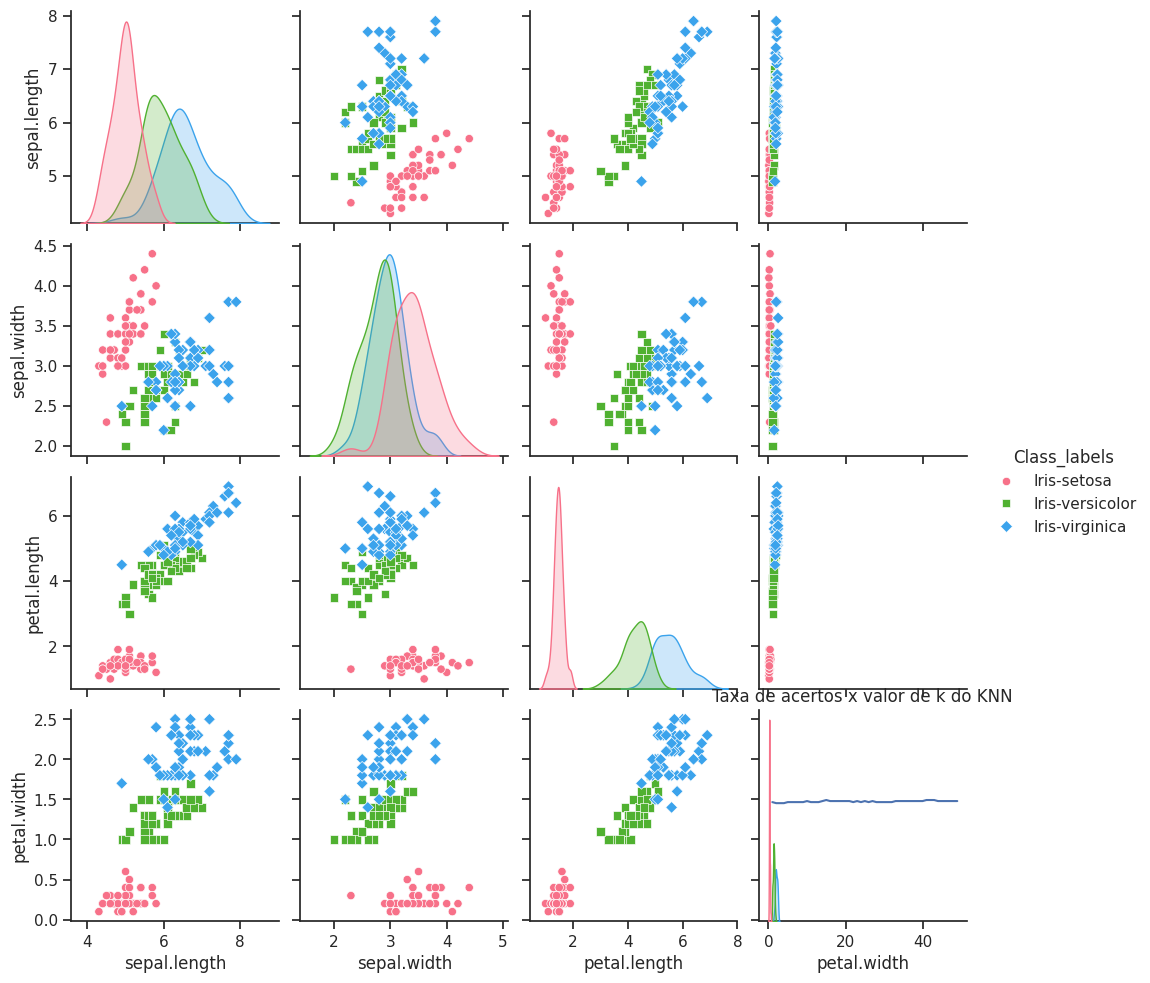

In [1]:
# Import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score # import the function

# Caminho do arquivo ​

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Define o nome das colunas ​

#Lê e carrega o arquivo para a memória ​

columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'Class_labels']
df = pd.read_csv(url,names=columns)
df.head()

# Select attributes
X = df[['petal.length', 'petal.width']]
y = df['Class_labels']

# Data visualization
sns.set(style="ticks", color_codes=True)
print(df)
sns.pairplot(df, hue="Class_labels", palette="husl", markers=["o", "s", "D"])
subspecies = df.Class_labels.unique()
color = ['red', 'green', 'blue']

# train/test split (80/20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
knn_model = knn.fit(x_train, y_train)

# Evaluate model performance
# accuracy
knn_model.score(x_test, y_test)
# classification report
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

# Para determinar a quantidade de acertos (acuracia)​
from sklearn.metrics import accuracy_score
acertos = accuracy_score(y_test, y_pred)
print("Acerto médio de classificação: ", acertos)




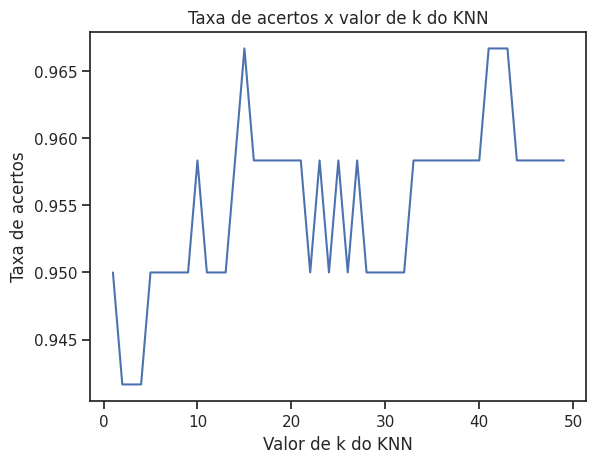

In [2]:
#### Resposta loop for para diferntes k​
k_range = list(range(1, 50))
scores = [] # changed to scores to avoid overwriting the function in the for loop
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy') # use lowercase x_train and y_train
    scores.append(score.mean())
plt.plot(k_range, scores) # changed to scores
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()

In [4]:
# Para determinar a quantidade de acertos (acuracia) ​

df_amostra = df.groupby('Class_labels')[['petal.length','petal.width']].mean()
df_amostra

,petal.length,petal.width
Class_labels,,
Iris-setosa,1.464,0.244
Iris-versicolor,4.260,1.326
Iris-virginica,5.552,2.026


In [8]:
knn_model.predict([[1.3, 3.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)